<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/CPE331/MIDTERMS/HOA_7_1_Castillo%2C_Ronel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 7: Data Wrangling with Pandas**

**CPE311 Computational Thinking with Python**

Submitted by: Castillo, Ronel Christian V.

Performed on: 07/03/2024

Submitted on: 07/09/2024


Submitted to: Engr. Roman M. Richard

# **Supplementary Activity**

Using datasets provided, perform the Following Exercises:

# **Exercise 1**

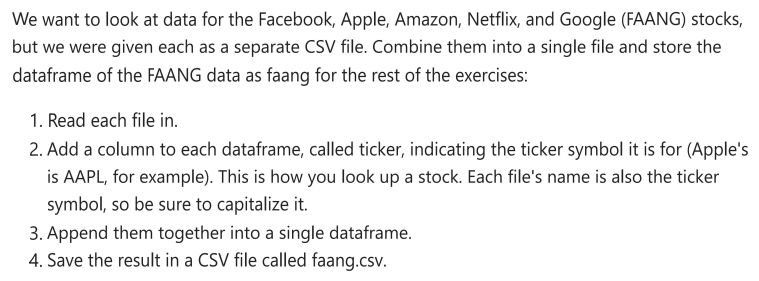

1. Read each file in

In [3]:
import pandas as pd

filepathFB= pd.read_csv("/content/fb.csv")
filepathAmz= pd.read_csv("/content/amzn.csv")
filepathApp= pd.read_csv("/content/aapl.csv")
filepathNet= pd.read_csv("/content/nflx.csv")
filepathGoog= pd.read_csv("/content/goog.csv")

2.

In [4]:
filepathFB['ticker'] = 'FB'
filepathAmz['ticker'] = 'AMZN'
filepathApp['ticker'] = 'AAPL'
filepathNet['ticker'] = 'NFLX'
filepathGoog['ticker'] = 'GOOG'

3. Append them all in a single Dataframe

In [9]:
# Append all DataFrames into a single DataFrame
faang = pd.concat([filepathFB, filepathAmz, filepathApp, filepathNet, filepathGoog])


print(faang)

           date     open     high        low    close    volume ticker
0    2018-01-02   177.68   181.58   177.5500   181.42  18151903     FB
1    2018-01-03   181.88   184.78   181.3300   184.67  16886563     FB
2    2018-01-04   184.90   186.21   184.0996   184.33  13880896     FB
3    2018-01-05   185.59   186.90   184.9300   186.85  13574535     FB
4    2018-01-08   187.20   188.90   186.3300   188.28  17994726     FB
..          ...      ...      ...        ...      ...       ...    ...
246  2018-12-24   973.90  1003.54   970.1100   976.22   1590328   GOOG
247  2018-12-26   989.01  1040.00   983.0000  1039.46   2373270   GOOG
248  2018-12-27  1017.15  1043.89   997.0000  1043.88   2109777   GOOG
249  2018-12-28  1049.62  1055.56  1033.1000  1037.08   1413772   GOOG
250  2018-12-31  1050.96  1052.70  1023.5900  1035.61   1493722   GOOG

[1255 rows x 7 columns]


4. save it in a new csv file called faang.csv

In [12]:
faang.to_csv("/content/faang.csv")
filepathFaang=pd.read_csv("/content/faang.csv")
print("New Dataframe 'faang.csv' ")
print(filepathFaang)

New Dataframe 'faang.csv' 
      Unnamed: 0        date     open     high        low    close    volume  \
0              0  2018-01-02   177.68   181.58   177.5500   181.42  18151903   
1              1  2018-01-03   181.88   184.78   181.3300   184.67  16886563   
2              2  2018-01-04   184.90   186.21   184.0996   184.33  13880896   
3              3  2018-01-05   185.59   186.90   184.9300   186.85  13574535   
4              4  2018-01-08   187.20   188.90   186.3300   188.28  17994726   
...          ...         ...      ...      ...        ...      ...       ...   
1250         246  2018-12-24   973.90  1003.54   970.1100   976.22   1590328   
1251         247  2018-12-26   989.01  1040.00   983.0000  1039.46   2373270   
1252         248  2018-12-27  1017.15  1043.89   997.0000  1043.88   2109777   
1253         249  2018-12-28  1049.62  1055.56  1033.1000  1037.08   1413772   
1254         250  2018-12-31  1050.96  1052.70  1023.5900  1035.61   1493722   

     ticker 

# **Exercise 2**

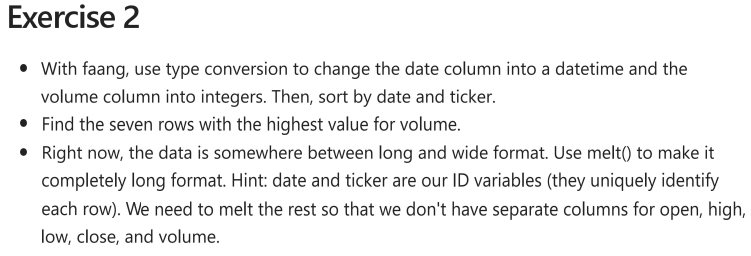

In [14]:
# Convert 'date' column - datetime
faang['date'] = pd.to_datetime(faang['date'])

# Convert 'volume' column - integers
faang['volume'] = faang['volume'].astype(int)

# Sort 'date' and 'ticker'
faang = faang.sort_values(by=['date', 'ticker'])

print(filepathFaang)

In [ ]:
# find seven rows with highest value for volume
top_seven_volume = faang.nlargest(7, 'volume')

In [16]:
# using pd.melt()
faangLong = pd.melt(faang, id_vars=['date', 'ticker'], var_name='variable', value_name='value')
# saving to a new csv file
faangLong.to_csv("/content/faang_long_format.csv")

filepathLong= pd.read_csv("/content/faang_long_format.csv")
print(filepathLong)

      Unnamed: 0        date ticker variable         value
0              0  2018-01-02   AAPL     open  1.669271e+02
1              1  2018-01-02   AMZN     open  1.172000e+03
2              2  2018-01-02     FB     open  1.776800e+02
3              3  2018-01-02   GOOG     open  1.048340e+03
4              4  2018-01-02   NFLX     open  1.961000e+02
...          ...         ...    ...      ...           ...
6270        6270  2018-12-31   AAPL   volume  3.500347e+07
6271        6271  2018-12-31   AMZN   volume  6.954507e+06
6272        6272  2018-12-31     FB   volume  2.462531e+07
6273        6273  2018-12-31   GOOG   volume  1.493722e+06
6274        6274  2018-12-31   NFLX   volume  1.350892e+07

[6275 rows x 5 columns]


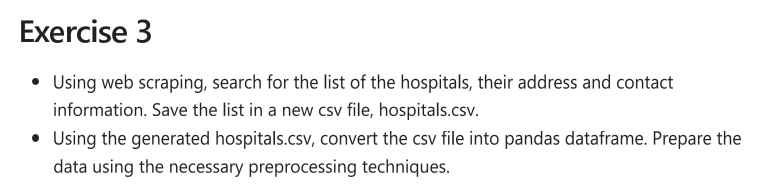

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_hospitals_in_Canada' # url of the list of hospitals in canada

# Send a GET request to the webpage
response = requests.get(url)
html_content = response.content

# Parse the HTML content of the page
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing the list of hospitals
tables = soup.find_all('table', class_='wikitable')

# List to store hospital data
hospitals = []

# Iterate over each table (one for each province/territory)
for table in tables:
    # Find all rows in the table
    rows = table.find_all('tr')

    # loop iteration for each row
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) >= 2:
            name = cols[0].text.strip()
            location = cols[1].text.strip()
            contact = cols[2].text.strip() if len(cols) > 2 else ''
            hospitals.append([name, location, contact])

hospitals_df = pd.DataFrame(hospitals, columns=['Name', 'Location', 'Contact']) # Convert the list of hospitals to a DataFrame

# Save the DataFrame to a CSV file
hospitals_df.to_csv('/content/hospitals.csv', index=False)

# Load the CSV file into a DataFrame for preprocessing
hospitals_df = pd.read_csv('/content/hospitals.csv')

# Preprocess the data
# Fill missing 'Contact' values with a placeholder
hospitals_df['Contact'] = hospitals_df['Contact'].fillna('No contact info')

# Remove duplicates
hospitals_df = hospitals_df.drop_duplicates()

# Ensure appropriate data types
hospitals_df['Contact'] = hospitals_df['Contact'].astype(str)

# Trim whitespace from string columns
hospitals_df['Name'] = hospitals_df['Name'].str.strip()
hospitals_df['Location'] = hospitals_df['Location'].str.strip()
hospitals_df['Contact'] = hospitals_df['Contact'].str.strip()

# Standardize the phone numbers by removing non-digit characters
hospitals_df['Contact'] = hospitals_df['Contact'].str.replace(r'\D', '', regex=True)

# Save the cleaned DataFrame to a new CSV file
hospitals_df.to_csv('/content/cleaned_hospitals.csv', index=False)

print("Cleaned hospitals data saved to cleaned_hospitals.csv")
print(hospitals_df.head())


Cleaned hospitals data saved to cleaned_hospitals.csv
                   Name     Location Contact
0      Chaleur Regional      General        
1  Campbellton Regional      General        
2  Restigouche Hospital  Psychiatric        
3        l'Enfant-Jésus      General        
4   Edmundston Regional      General        


# **7.2 Conclusion**

data wrangling as well as web scraping helps with extracting data with the help of external sources or sources that have been gathered by others or by you personally. With the data collected which can be considered as 'raw' data, can be transformed into a type of data that we need.

